In [24]:
## Importing imp modules
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50,decode_predictions,preprocess_input
from keras.optimizers import Adam

In [1]:
### Loading data from the dropbox
!wget https://www.dropbox.com/s/yvy9rjqjcte1fqr/dogs-cats-horses-humans-dataset.zip?dl=0

--2020-06-25 10:09:10--  https://www.dropbox.com/s/yvy9rjqjcte1fqr/dogs-cats-horses-humans-dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yvy9rjqjcte1fqr/dogs-cats-horses-humans-dataset.zip [following]
--2020-06-25 10:09:10--  https://www.dropbox.com/s/raw/yvy9rjqjcte1fqr/dogs-cats-horses-humans-dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e8b82a4f5bf2b1d96796dc1ef.dl.dropboxusercontent.com/cd/0/inline/A6VKUZN6eLAf6lrDGqp0BKCZGnt4tHm5jxdRmxFUpsM47iSNrObLS73ZMjQMgoV0PDCCt3xwj8aihbuSJODCUV3ZIHINSjQkKWEDkDz4M-zIKRb2WWSsojbY3nqBEK2Q7nM/file# [following]
--2020-06-25 10:09:11--  https://uc7e8b82a4f5bf2b1d96796dc1ef.dl.dropboxusercontent.com/cd/0/inline/A6VKUZN6eLAf6lrDGqp0BKCZGnt4tHm5jxdRmxFU

In [2]:
## Unziping the data
!unzip dogs-cats-horses-humans-dataset.zip?dl=0

Archive:  dogs-cats-horses-humans-dataset.zip?dl=0
  inflating: dataset/cats/cat.1.jpg  
  inflating: dataset/cats/cat.10.jpg  
  inflating: dataset/cats/cat.100.jpg  
  inflating: dataset/cats/cat.101.jpg  
  inflating: dataset/cats/cat.102.jpg  
  inflating: dataset/cats/cat.103.jpg  
  inflating: dataset/cats/cat.104.jpg  
  inflating: dataset/cats/cat.105.jpg  
  inflating: dataset/cats/cat.106.jpg  
  inflating: dataset/cats/cat.107.jpg  
  inflating: dataset/cats/cat.108.jpg  
  inflating: dataset/cats/cat.109.jpg  
  inflating: dataset/cats/cat.11.jpg  
  inflating: dataset/cats/cat.110.jpg  
  inflating: dataset/cats/cat.111.jpg  
  inflating: dataset/cats/cat.112.jpg  
  inflating: dataset/cats/cat.113.jpg  
  inflating: dataset/cats/cat.114.jpg  
  inflating: dataset/cats/cat.115.jpg  
  inflating: dataset/cats/cat.116.jpg  
  inflating: dataset/cats/cat.117.jpg  
  inflating: dataset/cats/cat.118.jpg  
  inflating: dataset/cats/cat.119.jpg  
  inflating: dataset/cats/cat.12.

In [4]:
import os,shutil
os.listdir('dataset/dataset')

## Creating the validation data folder
if not os.path.isdir("val_images"):
  os.mkdir("val_images")

### Adding diff folders in the validation folder
classes = ['cats','dogs','horses','humans']
for c in classes:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)

print(os.listdir('val_images'))

### Adding data in the folder
SPLIT = 0.9
for f in os.listdir('dataset/dataset'):
  path = os.path.join('dataset/dataset',f)
  imgs = os.listdir(path)
  split_size = int(SPLIT*len(imgs))
  files_to_moves = imgs[split_size:]
  for img_s in files_to_moves:
    src = os.path.join(path,img_s)
    dest = os.path.join('val_images',f)
    shutil.move(src,dest)

print("The size of the training data is")
for f in classes:
  print(f + " " + str(len(os.listdir('dataset/dataset/'+f))))

print("The size of the validation data is")
for f in classes:
  print(f + " " + str(len(os.listdir('val_images/'+f))))

['horses', 'dogs', 'cats', 'humans']
The size of the training data is
cats 162
dogs 162
horses 162
humans 162
The size of the validation data is
cats 40
dogs 40
horses 40
humans 40


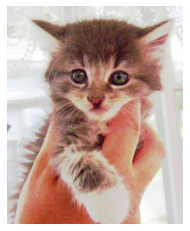

In [8]:
## Vislize the image
from matplotlib import pyplot as plt

sample_path = "dataset/dataset/cats/cat.100.jpg"
img = image.load_img(sample_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
## Making the image generator
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1.0/255.0,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
)

validation_gen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_gen.flow_from_directory(
    "dataset/dataset/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = validation_gen.flow_from_directory(
    "val_images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [13]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 224, 224, 3)
(32, 4)


In [21]:
### Training the model
model = ResNet50(include_top = False,weights = 'imagenet',input_shape=(224,224,3))
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [22]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input,output=fc2)

model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [23]:
for ix in range(164,len(model_new.layers)):
  model_new.layers[ix].trainable = False

In [30]:
##Training
adam = Adam(lr=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

history = model_new.fit_generator(
    train_generator,
    epochs = 5,
    steps_per_epoch = 5,
    validation_data = val_generator,
    validation_steps = 4   
)

Epoch 1/5
5/5 [==============================] - 18s 4s/step - loss: 0.3218 - accuracy: 0.8971 - val_loss: 2.4325 - val_accuracy: 0.2812
Epoch 2/5
5/5 [==============================] - 2s 479ms/step - loss: 0.5036 - accuracy: 0.8313 - val_loss: 4.1940 - val_accuracy: 0.2656
Epoch 3/5
5/5 [==============================] - 2s 437ms/step - loss: 0.7203 - accuracy: 0.7688 - val_loss: 3.4291 - val_accuracy: 0.2656
Epoch 4/5
5/5 [==============================] - 2s 438ms/step - loss: 0.5577 - accuracy: 0.8062 - val_loss: 4.6064 - val_accuracy: 0.2812
Epoch 5/5
5/5 [==============================] - 3s 561ms/step - loss: 0.5324 - accuracy: 0.7937 - val_loss: 1.5087 - val_accuracy: 0.2422


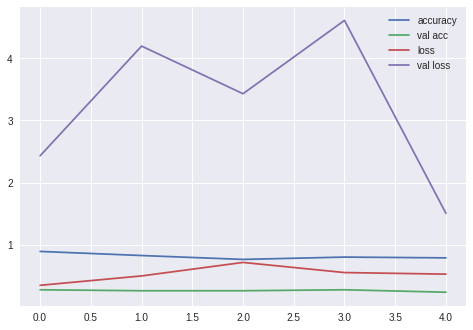

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

plt.style.use("seaborn")
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()